# Machine Learning with Python

Collaboratory workshop, 10/14/2021

This is a notebook developed for the third day of the Collaboratory Workshop, Machine Learning with Python. For more information, go to the workshop home page:

https://github.com/kose-y/W17.MachineLearning/wiki/Day-3

- __Day 1__ - Fundamentals and Motivation
- __Day 2__ - Classification and Cross-Validation
- __Day 3__ - Regression and Unsupervised Learning
    - Linear and nonlinear regressions
    - Unsupervised learning
    - Conclusions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15 # increase font size within a plot

## Regression

From a set of features, determine a continuous target. 

e.g., Create a function that estimates the cell volume 
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/2560px-Linear_regression.svg.png" width="300"/>
    </div>

## Linear regression

Say, we predict a volume (`V`) of a cell by their length (`L`), width (`d`), and smoothness (`s`). 
$$
V(L, d, s) = \alpha L + \beta d + \gamma s + V_0
$$

Training in linear regression means finding the best possible parameters $\alpha$, $\beta$, $\gamma$, and $V_0$.
A linear regression is any regression of a model that is linear on the fitting parameters.

### Creating a simple dataset

Let's get started creating a simple linear dataset using NumPy's random function:

In [2]:
numSamples = 100     # Defining the number of samples

linearCoef = 0.5     # This is the correct linear coeficient
Intercept  = 2.2     # This is the correct intercept parameter

X = np.random.random( numSamples )*10.0     # Randomly sampling X-points.
e = np.random.random( numSamples ) - 0.5    # Noise

print("Min of X: ", X.min())
print("Max of X: ", X.max())
print("Average of the error component: ", e.mean())

Min of X:  0.028166591536112895
Max of X:  9.760566995612173
Average of the error component:  -0.011711901944278817


Let's define the the dependent variable

In [3]:
Y = linearCoef*X + Intercept + e

Let's plot it: 

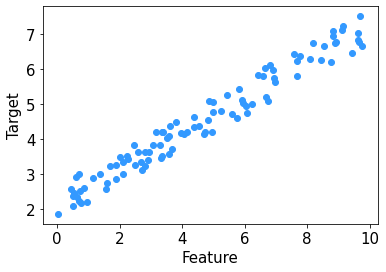

In [4]:
plt.plot(X, Y, 'o', color=(0.2,0.6,1.0)) # color: red-green-blue. 

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

We want to use the linear model 
$$ Y = \beta X + \gamma $$
If everything works out, we should expect $\beta \approx 0.5$ and $\gamma \approx 2.2$.

We split the dataset into training set and test set.

In [5]:
from sklearn.model_selection import train_test_split

# features must have shape (100,1), while X has shape (100,)
X = X.reshape((numSamples,1)) 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33)

One may perform linear regression using the class `LinearRegression` in `linear_model` subpackage.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit( X_train , Y_train )

LinearRegression()

In [8]:
x_array = np.linspace(0,10,100)
y_array = model.predict( x_array.reshape((100,1)) )

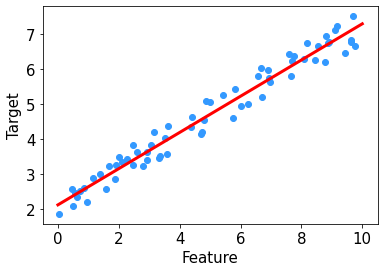

In [9]:
plt.plot(X_train, Y_train, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

Similarly to the classifiers covered yesterday, you can access information of the fitted `LinearRegression` model  through their attributes:

In [10]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [0.51670343]
Intercept:    2.1155266664807026


### Performance measure

In analogy with a classifier's accuracy, the most commonly used metric to evaluate the performance of linear regression is the coefficient of determination ($R^2$). 

$R^2$ is defined as $(1 - \frac{u}{v})$, where $u$ is the residual sum of squares `((y_true - y_pred)** 2).sum()` and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`.

- $v$ represents total variation, or "total sum of squares"
- $u$ represents unexplained variation, or "residual sum of squares"

In [11]:
print("R-sq on test set: ", model.score(X_test, Y_test))

R-sq on test set:  0.9364180738867334


## Polynomial regression

A linear regression is any regression of a model that is linear on the fitting parameters, e.g., 
$$Y = \beta_1 X + \beta_2 Z + \gamma$$

What about this model?
$$Y = \beta_1 X + \beta_2 X^2 + \gamma$$

Although the model is quadratic, __this is still considered a linear regression__, and can be solved using the same methods. 

Creating a 2D feature space with $X$ and $X^2$.

In [ ]:
(linearCoef*X + 0.15*X**2 + Intercept + e).shape

Generate the dataset:

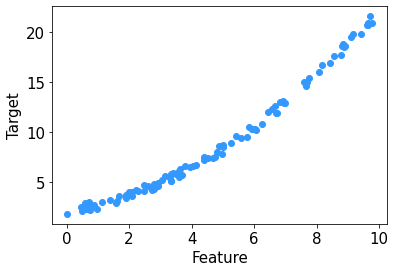

In [12]:
e = e.reshape((len(e),1))
Y = linearCoef*X + 0.15*X**2 + Intercept + e

plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))

plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

Splitting the data to training and test sets, and creating a new feature matrix:

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.33)

features = np.zeros( (len(X_train),2) )
features[:,0] = X_train[:,0]
features[:,1] = X_train[:,0]**2
print(features.shape)

(67, 2)


Fitting the model:

In [14]:
model = LinearRegression()
model.fit( features , Y_train )

print("Coefs: ",model.coef_)
print("Intercept: ",model.intercept_)

Coefs:  [[0.53111123 0.14697893]]
Intercept:  [2.14054856]


You can calculate again the prediction along the x axis, and plot it:

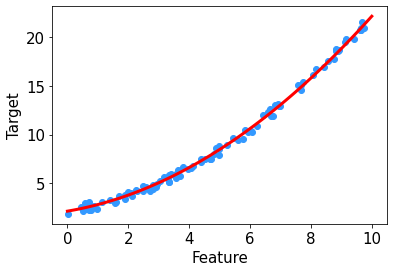

In [15]:
x_array = np.linspace(0,10,100)
y_array =  (x_array * model.coef_[0,0] + x_array**2*model.coef_[0,1] 
                + model.intercept_)

plt.plot(X, Y, 'o', color=(0.2,0.6,1.0))
plt.plot(x_array, y_array, 'r-', linewidth=3.)
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

## Regularization and Overfitting


Let's explore a more interesting dataset.

In [16]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(50, 2)


In [17]:
Y_origin = data[:,0]    # all rows, first column
X_origin = data[:,1]   # all rows, second column

X, X_test, Y, Y_test = train_test_split(
        X_origin,Y_origin,test_size=0.2,
        shuffle=True)

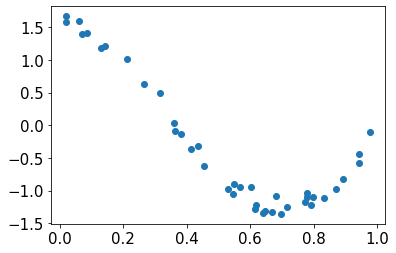

In [18]:
plt.plot(X, Y, 'o')
plt.savefig("regression_data.png", dpi=500)
plt.show()

Lets store in the next array the average value of the coefficeints

In [19]:
coefs = []
degrees = []

In [20]:
model = LinearRegression()
model.fit( X , Y )

ValueError: Expected 2D array, got 1D array instead:
array=[0.67063787 0.60276338 0.45615033 0.43703195 0.63992102 0.54488318
 0.97861834 0.77815675 0.891773   0.94374808 0.616934   0.52889492
 0.0202184  0.26455561 0.07103606 0.0871293  0.79172504 0.6818203
 0.56843395 0.3595079  0.21038256 0.38344152 0.79915856 0.1289263
 0.77423369 0.83261985 0.06022547 0.64589411 0.6976312  0.31542835
 0.78052918 0.87001215 0.6176355  0.41466194 0.0187898  0.94466892
 0.36371077 0.5488135  0.14335329 0.71518937].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

According the error message above, the issue is probably with the shape of X.

In [21]:
print( X.shape )

(40,)


As we extensively discussed on Day 2, the features should be organized in an array with shape ```(<Num Samples>, <Num Features>)```. In this particular case, we have only a single feature, so ```Num Features```=1. This is why we will update the shape of X using numpy's reshape function:

In [22]:
X = X.reshape( (X.shape[0], 1 )) 

In [23]:
print( X.shape )

(40, 1)


In [24]:
coefs = []
degrees = []

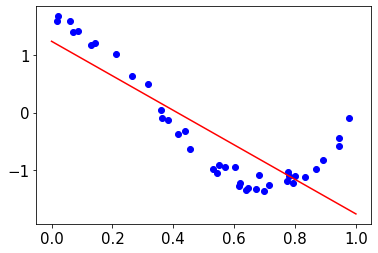

In [25]:
model = LinearRegression()
model.fit( X , Y )

degrees.append(1) #One degree
coefs.append( np.abs(model.coef_).mean() )

x_array = np.linspace(0,1,100)
x_array = x_array.reshape((len(x_array),1))
y_array = model.predict(x_array)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.savefig('regression_underfit.png', dpi=500)
#plt.show()

This does not fit our data well: __underfitting__. 

To use polynomials with higher degrees, we need an array that serves as our input features, having as many columns as the degrees in our polynomial. 

`numpy.c_` simplifies columnwise concatenation. 

In [26]:
X_poly = np.c_[ X, X**2 ] # concatenating two columns
print( X_poly.shape )

(40, 2)


All we need to do is train on features and plot it:

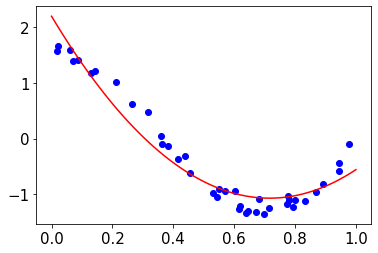

In [27]:
model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(2) #Second degree
coefs.append( np.abs(model.coef_).mean() )

x_array = np.linspace(0,1,100)
x_array_poly = np.c_[ x_array, x_array**2 ]
y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

Let's create a function that create the 2D array of features for any degree:

In [28]:
def getPoly(myArray,degree):
    
    result = np.zeros((myArray.shape[0],degree))
    for j in range(degree):
        result[:,j] = myArray.ravel()**(j+1)
    return result

Let's try with a fifth-degree polynomial. Of course, adding terms by hand is not very efficient, but we can construct the ```X_poly``` array for an arbitrary polynomial by using the following snippet of code:

In [29]:
X_poly = getPoly(X,degree=5)
print(X_poly.shape)

(40, 5)


Let's now evaluate and plot it:

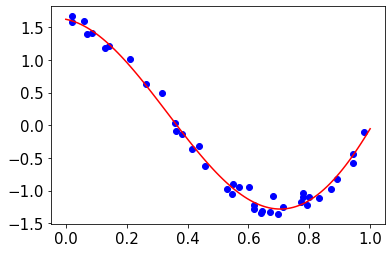

In [30]:
d = 5
X_poly = getPoly(X,degree = d)
x_array_poly = getPoly(x_array,degree = d)

model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.show()

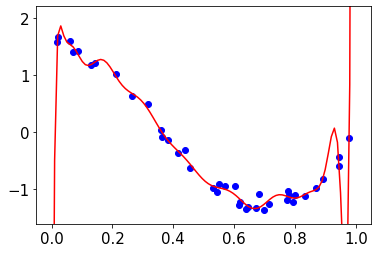

In [31]:
d = 20
X_poly = getPoly(X,degree = d)
x_array_poly = getPoly(x_array,degree = d)

model = LinearRegression()
model.fit( X_poly , Y )

degrees.append(d) #d-th degree
coefs.append( np.abs(model.coef_).mean() )

y_array = model.predict(x_array_poly)

plt.plot(X, Y, 'bo')
plt.plot(x_array, y_array, 'r-')
plt.ylim(-1.6, 2.2)
plt.show()

In [32]:
print(degrees)
print(coefs)

[1, 2, 5, 20]
[2.988310721406972, 7.761550096738351, 9.033837507131981, 3500130871764.248]


19-degree fit seems to be an __overfitting__: We can easily see that the coefficients are growing with the degree.

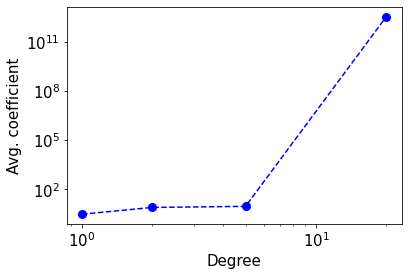

In [33]:
plt.loglog(degrees, coefs,'bo--', markersize=8)

plt.ylabel('Avg. coefficient')
plt.xlabel('Degree')

plt.show()

## Exploring hyperparameter regularization using the Ridge model

This form of overfitting is common with linear regressions. 

- Linear regression we have used thus far: minimizes the quadratic error 
$$
\min_\beta \|f_\beta(x) - y\|^2
$$

- To avoid uncontrolled increase in the model parameters, we can penalize large coefficients:
$$
\min_\beta \|f_\beta(x) - y\|^2 + \alpha \|\beta\|^2
$$

This addition of the second term is called __regularization__. $\alpha$ is a new hyperparameter introduced. 

In [34]:
from sklearn.linear_model import Ridge

We fit 20-degree polynomial with ridge regression. 

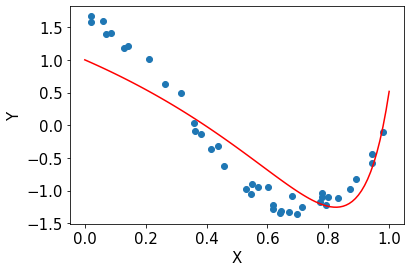

In [35]:
model = Ridge( alpha = 1.0 )
model.fit( X_poly , Y )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

This is often the result of $\alpha$ too large. Let's try smaller $\alpha$. 

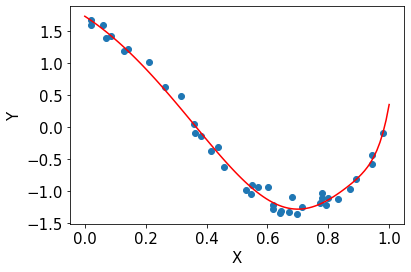

In [36]:
model = Ridge( alpha = 0.001 )
model.fit( X_poly , Y )

plt.plot(X, Y, 'o')
plt.plot(x_array, model.predict(x_array_poly), 'r-')

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

__Exercise__: One may split the dataset into train-validation-test set, or split it into learning set and test set then use cross-validation on the learning set to choose the best $\alpha$, similar to what is done in yesterday's workshop. 

# Unsupervised Learning

So far, for both classification and regression, we have used labels for training to map features to those labels. 

In unsupervised learning, no labels are used. The main idea is to discover hidden patterns in the data and use them to generate descriptive statistics. 
<div>
<img src="unsupervised_learning.png" width="500"/>
</div>

### Clustering

Clustering is grouping examples to certain group with similar features. 


__$K$-means__ clustering: find $K$ clusters of points in which each observation belongs to the cluster with the nearest cluster centers, serving as a prototype of the cluster. 
- Regression: e.g., Create a function that estimates the cell volume 
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif" width="400"/>
    </div>


__Hierarchical__ clustering: Seeks to build a hierarchy of clusters.
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png" width="300"/>
</div>

### K-means Clustering

This methods partitions the feature space into $K$ clusters based on the means of points.

1. Randomly initialize clusters' centers
2. Assign points to the nearest cluster center
3. Update the positions of the centers
4. Repeat 2-3. 

| | | | |
|:---:|:---:|:---:|:---:|
|![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/K_Means_Example_Step_1.svg/1920px-K_Means_Example_Step_1.svg.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/K_Means_Example_Step_2.svg/2560px-K_Means_Example_Step_2.svg.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/K_Means_Example_Step_3.svg/2560px-K_Means_Example_Step_3.svg.png) | ![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/2560px-K_Means_Example_Step_4.svg.png) |

Let's explore the iris dataset using the K-means clustering algorithm. We first import the data using ```sklearn.datasets```.

### Iris dataset

- Among the most famous datasets in machine learning.
- Measurements from three different species of iris plant: Iris setosa, Iris versicolor, and Iris virginica.
- Four features: Sepal and petal lengths and widths. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/900px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" width="150"/>



In [37]:
from sklearn.datasets import load_iris

In [38]:
iris_data = load_iris()
print( iris_data.data.shape )

(150, 4)


In [39]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Before we move on, let's visualize the dataset. You can change the features being visualized below.

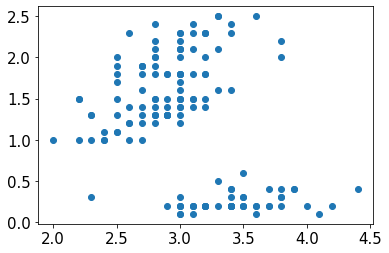

In [40]:
plt.plot( iris_data.data[:,1], iris_data.data[:,3], 'o' ) # Sepal width and Petal width.
plt.show()

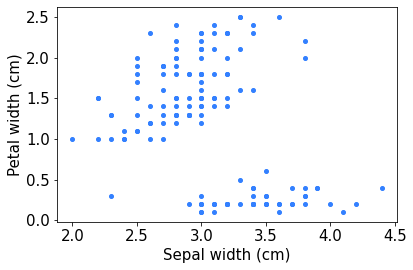

In [41]:
plt.plot( iris_data.data[:,1], iris_data.data[:,3], 'o', 
            color=(0.2,0.5,1.0), markersize=4 )

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

plt.tight_layout()
plt.show()

Next, let's create a KMeans model and apply to the iris dataset. Because we know there are three different species of plants in this dataset, let's make an educated guess and use $K=3$ (i.e., we will set the parameter ```n_clusters``` to 3).

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [42]:
from sklearn.cluster import KMeans

In [43]:
kmeans = KMeans( n_clusters=3 )

In [44]:
kmeans.fit( iris_data.data )

KMeans(n_clusters=3)

After the K-means method is applied to the dataset, we can then get the ID of the clusters to which each of the samples is predicted to belong to by using the method ```predict```. 

In [45]:
clusters = kmeans.predict( iris_data.data )
print( "Shape: ", clusters.shape )
print( "Cluster IDs: ", clusters )

Shape:  (150,)
Cluster IDs:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Let's visualize the resulting clustering by color-coding each cluster ID. This is very similar to how we color-coded different classes in classification datasets.

In [46]:
index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2

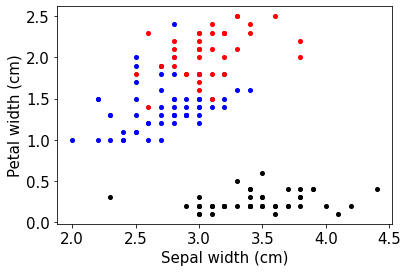

In [47]:
plt.plot( iris_data.data[index0,1], iris_data.data[index0,3], 
            'o', color='b', markersize=4 )
plt.plot( iris_data.data[index1,1], iris_data.data[index1,3], 
            'o', color='k', markersize=4 )
plt.plot( iris_data.data[index2,1], iris_data.data[index2,3], 
            'o', color='r', markersize=4 )

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

plt.show()

Let's try $K=4$ and inspect what comes out differently. 

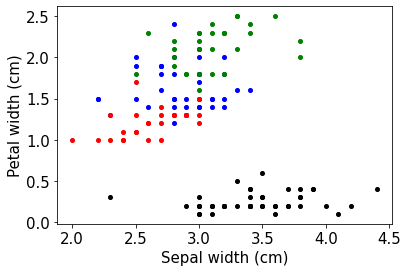

In [48]:
kmeans = KMeans( n_clusters=4 )
kmeans.fit( iris_data.data )
clusters = kmeans.predict( iris_data.data )

index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2
index3 = clusters == 3

plt.plot( iris_data.data[index0,1], iris_data.data[index0,3], 
            'o', color='b', markersize=4 )
plt.plot( iris_data.data[index1,1], iris_data.data[index1,3], 
            'o', color='k', markersize=4 )
plt.plot( iris_data.data[index2,1], iris_data.data[index2,3], 
            'o', color='r', markersize=4 )
plt.plot( iris_data.data[index3,1], iris_data.data[index3,3], 
            'o', color='g', markersize=4 )

plt.xlabel('Sepal width (cm)')
plt.ylabel('Petal width (cm)')

plt.show()

- Because K-means assumes known number of clusters, there is some freedom. $K$ can be treated as a hyperparameter. 
- There are methodologies that do not assume the number of clusters known (e.g. affinity propagation, density-based clustering, etc.)
- K-means is one of the simplest clustering algorithm, and might not be ideal for your application. However, some modifications (e.g. K-medians, K-means++, etc.) are still widely used.
- When applying clustering, remember that this is different from classification: if what you need is predict categories associated to samples, use supervised learning if possible.

## Principal Component Analysis

PCA can be included in the umbrella of unsupervised learning methods. 

- __PCA finds a set of new features that are uncorrelated among themselves__. 
- This is interesting because __correlated features overlap in what information content they include__. 
- The features are linear combination of the original features that maximally describes variations in the feature space. 

### A little bit more detail of PCA

__Covariance__: a measure of joint variability of two random variables: 

$$
Cov(X, Y) = E[XY] - E[X] E[Y]
$$

- If the two variables are independent, covariance between them is zero. 
- For instance, number of people riding New York subway and probability of rain in New York have high positive covariance 

__Covariance Matrix__: The matrix of covariances between each pair of variables in a set. Always positive definite and symmetric

__Change of basis__

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1920px-GaussianScatterPCA.svg.png" width="300"/>


The new covariance matrix is diagonal, new basis are orthogonal from each other. i.e., uncorrelated.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Let's see PCA in action by creating three variables with correlation:

In [49]:
from sklearn.decomposition import PCA

In [50]:
# 200 samples with 3 features
X = np.random.random( (200, 3) )   
X[:,2] = X[:,0] # First and last features are perfectly corrleated

numpy's cov function assumes each row to be each variable, so we transpose it.


Covariance matrix:
  [[0.0806349  0.00942195 0.0806349 ]
 [0.00942195 0.08400246 0.00942195]
 [0.0806349  0.00942195 0.0806349 ]]


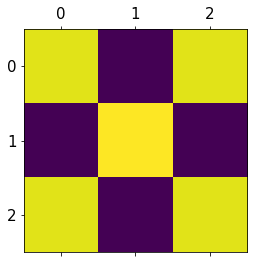

In [51]:
# \n breaks the line
print("Covariance matrix:\n ", np.cov(X.T)) 
plt.matshow(np.cov(X.T))
plt.show()

### Applying the PCA transformation


In [52]:
pca = PCA()
pca.fit(X)

PCA()

Proportions of variance explained by each principal component. Because two of the features were perfectly correlated, it is expected to have first two PCs explains most of the variance.

In [53]:
pca.explained_variance_ratio_

array([6.66618679e-01, 3.33381321e-01, 6.75806808e-33])

In [54]:
pca.components_ # Each column is the principal component

array([[ 6.97379492e-01,  1.65298789e-01,  6.97379492e-01],
       [ 1.16883895e-01, -9.86243535e-01,  1.16883895e-01],
       [ 7.07106781e-01,  3.99110263e-17, -7.07106781e-01]])

The PC with highest variance includes variables 0 and 2; and the second PC mostly includes variable 1. 

The transformation computes the coordinated based on the changed basis 

[[ 1.63503066e-01  1.48682163e-17 -1.11077535e-17]
 [ 1.48682163e-17  8.17691882e-02 -3.43642118e-18]
 [-1.11077535e-17 -3.43642118e-18  1.07172485e-33]]


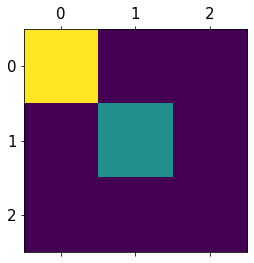

In [55]:
X_transform = pca.transform(X)
print(np.cov(X_transform.T))
plt.matshow(np.cov(X_transform.T))
plt.savefig('CovMatrix_example_PCA.png', dpi=300)
plt.show()

No off-diagonal elements, almost no self-correlation for the last variable. 

##  Using PCA on the Breast Cancer dataset

Let's apply PCA to the Breast cancer dataset from Day 1: 

In [56]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

We split the data into training and test datasets.

In [57]:
X, X_test, Y, Y_test = train_test_split(
        bcancer.data,bcancer.target,test_size=0.2,
        shuffle=False)

In [58]:
pca = PCA()
pca.fit( X )

PCA()

Let's visualize the importance of each Principal Component.

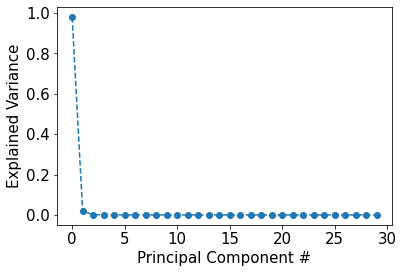

In [59]:
plt.plot( pca.explained_variance_ratio_, 'o--' )
plt.ylabel( 'Explained Variance' )
plt.xlabel( 'Principal Component #' )
plt.show()

A better way to visualize the decay is using log-scale:

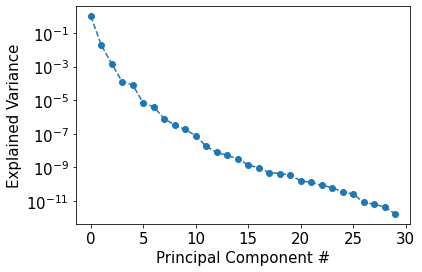

In [60]:
plt.plot( pca.explained_variance_ratio_, 'o--' )
plt.ylabel( 'Explained Variance' )
plt.yscale('log')
plt.xlabel( 'Principal Component #' )
plt.show()

As a __dimensionality reduction__, we can choose only the first two principal components. We can apply any other machine learning methods we learned in this workshop on the data with the reduced dimension: 

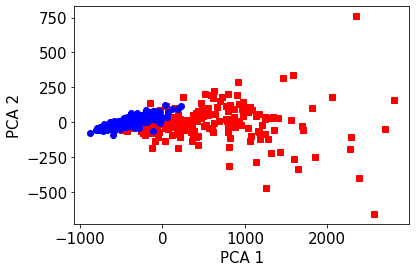

In [61]:
X_PCAs = pca.transform( X )

index0 = (Y == 0)
index1 = (Y == 1)

plt.plot( X_PCAs[index0,0], 
         X_PCAs[index0,1], 's', color='r' ) # malignant
plt.plot( X_PCAs[index1,0], 
         X_PCAs[index1,1], 'o', color='b' ) # benign

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

We can fit random forest classifier on the transformed two-dimensional features:

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 5)
clf.fit(X_PCAs[:, :2],Y)

X_test_PCAs = pca.transform( X_test )
clf.score(X_test_PCAs[:,:2],Y_test)

0.9210526315789473

We still get an OK result with only two features. On a high-dimensional dataset such as gene expression, where the number of features is much higher than the number of samples, it often improves the results. 

## Concluding Remarks

- We extensively explored __Jupyter Notebook__
- We explored useful functionalities from __NumPy__ and __Matplotlib__ libraries
- We studied __supervised learning__ and its two fundamental sub-fields: __classification__ and __regression__. 
- We investigated __Scikit-learn__'s structure and discussed in detail how to use its documentation pages. 
- At the end, we briefly discussed __unsupervised learning__. 

| | | |
|:---:|:---:|:---:|
|<img src="https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png" width="300"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/2560px-Linear_regression.svg.png" width="300"/> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/K_Means_Example_Step_4.svg/2560px-K_Means_Example_Step_4.svg.png" width="300"/> |

One prominent topic we did not cover in this workshop is Neural Networks. Due to recent advancement in hardware, using multiple layers of neural networks have been massively successful in many fields, including image classification and segmentation. I believe it deserves a separate 3-day workshop with higher hardware demand (i.e. access to GPUs.)

### Some related books:

- Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow - __Aurélien Géron__ (2nd ed.) : Similar approach to this workshop, with some information in deep learning with Keras and TensorFlow
![](https://images-na.ssl-images-amazon.com/images/I/51aqYc1QyrL._SX342_SY445_QL70_FMwebp_.jpg)

- Pattern Recognition and Machine Learning - __Christopher M. Bishop__ : Some mathematical approach to machine learning. 
![](https://images-na.ssl-images-amazon.com/images/I/61ECBlvkBCL._SY291_BO1,204,203,200_QL40_FMwebp_.jpg)
- Machine Learning: A Probabilistic Approach - __Kevin Murphy__ : More mathematically advanced stuff, with online software available.
![](https://images-na.ssl-images-amazon.com/images/I/41GaLtcZ2sL._SX218_BO1,204,203,200_QL40_FMwebp_.jpg)
- Deep Learning - __Ian Goodfellow__, __Yoshua Bengio__, and __Aaron Courville__
![](https://images-na.ssl-images-amazon.com/images/I/61qbj4KwauL._SX218_BO1,204,203,200_QL40_FMwebp_.jpg)

The goal of this workshop was 
- to provide basic information to become independent
- increase knowledge with online resources

I hope this workshop helped in this direction. 
<div>
<img src="../GoalFigure.png" width="400"/>
    </div>
    

# Thank you!